In [ ]:
#Importações que foram utilizadas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/qualidade_agua_dataset.csv')

In [ ]:
df.head()

,ph,oxigenio_dissolvido,nitrato,fosfato,microplasticos,salinidade,agua_boa
0,8.1,6.2,0.5,0.03,10,34.8,sim
1,7.8,5.8,2.0,0.10,25,35.0,nao
2,8.3,6.5,0.2,0.02,5,35.2,sim
3,7.9,4.5,1.5,0.05,50,33.7,nao
4,8.0,5.5,0.8,0.04,15,34.5,sim


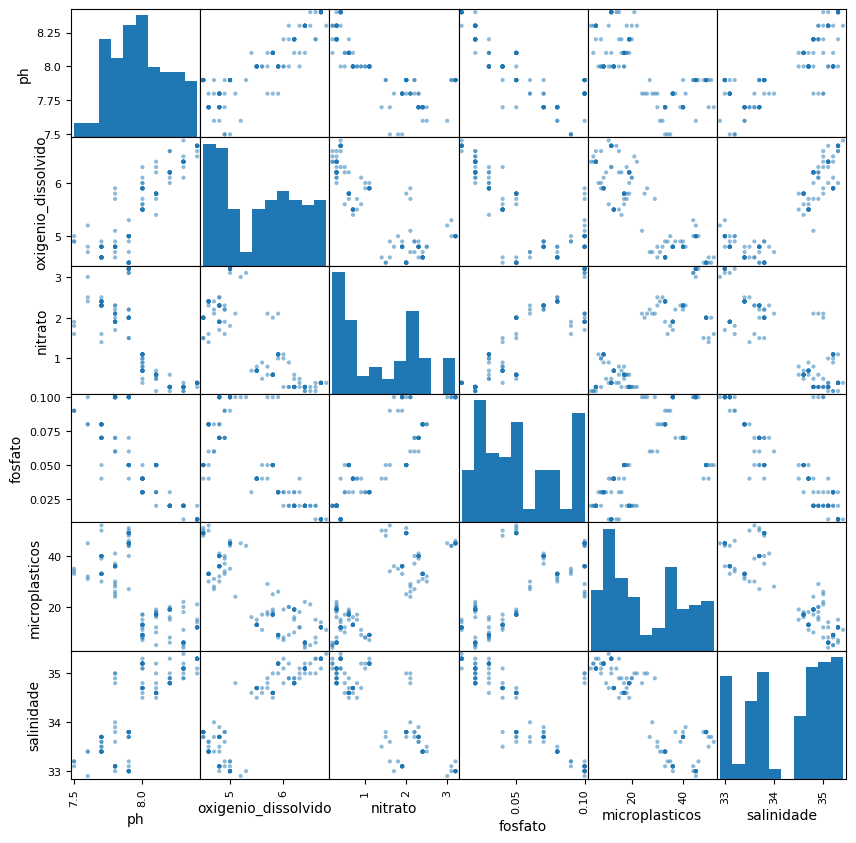

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(10, 10))

plt.show()

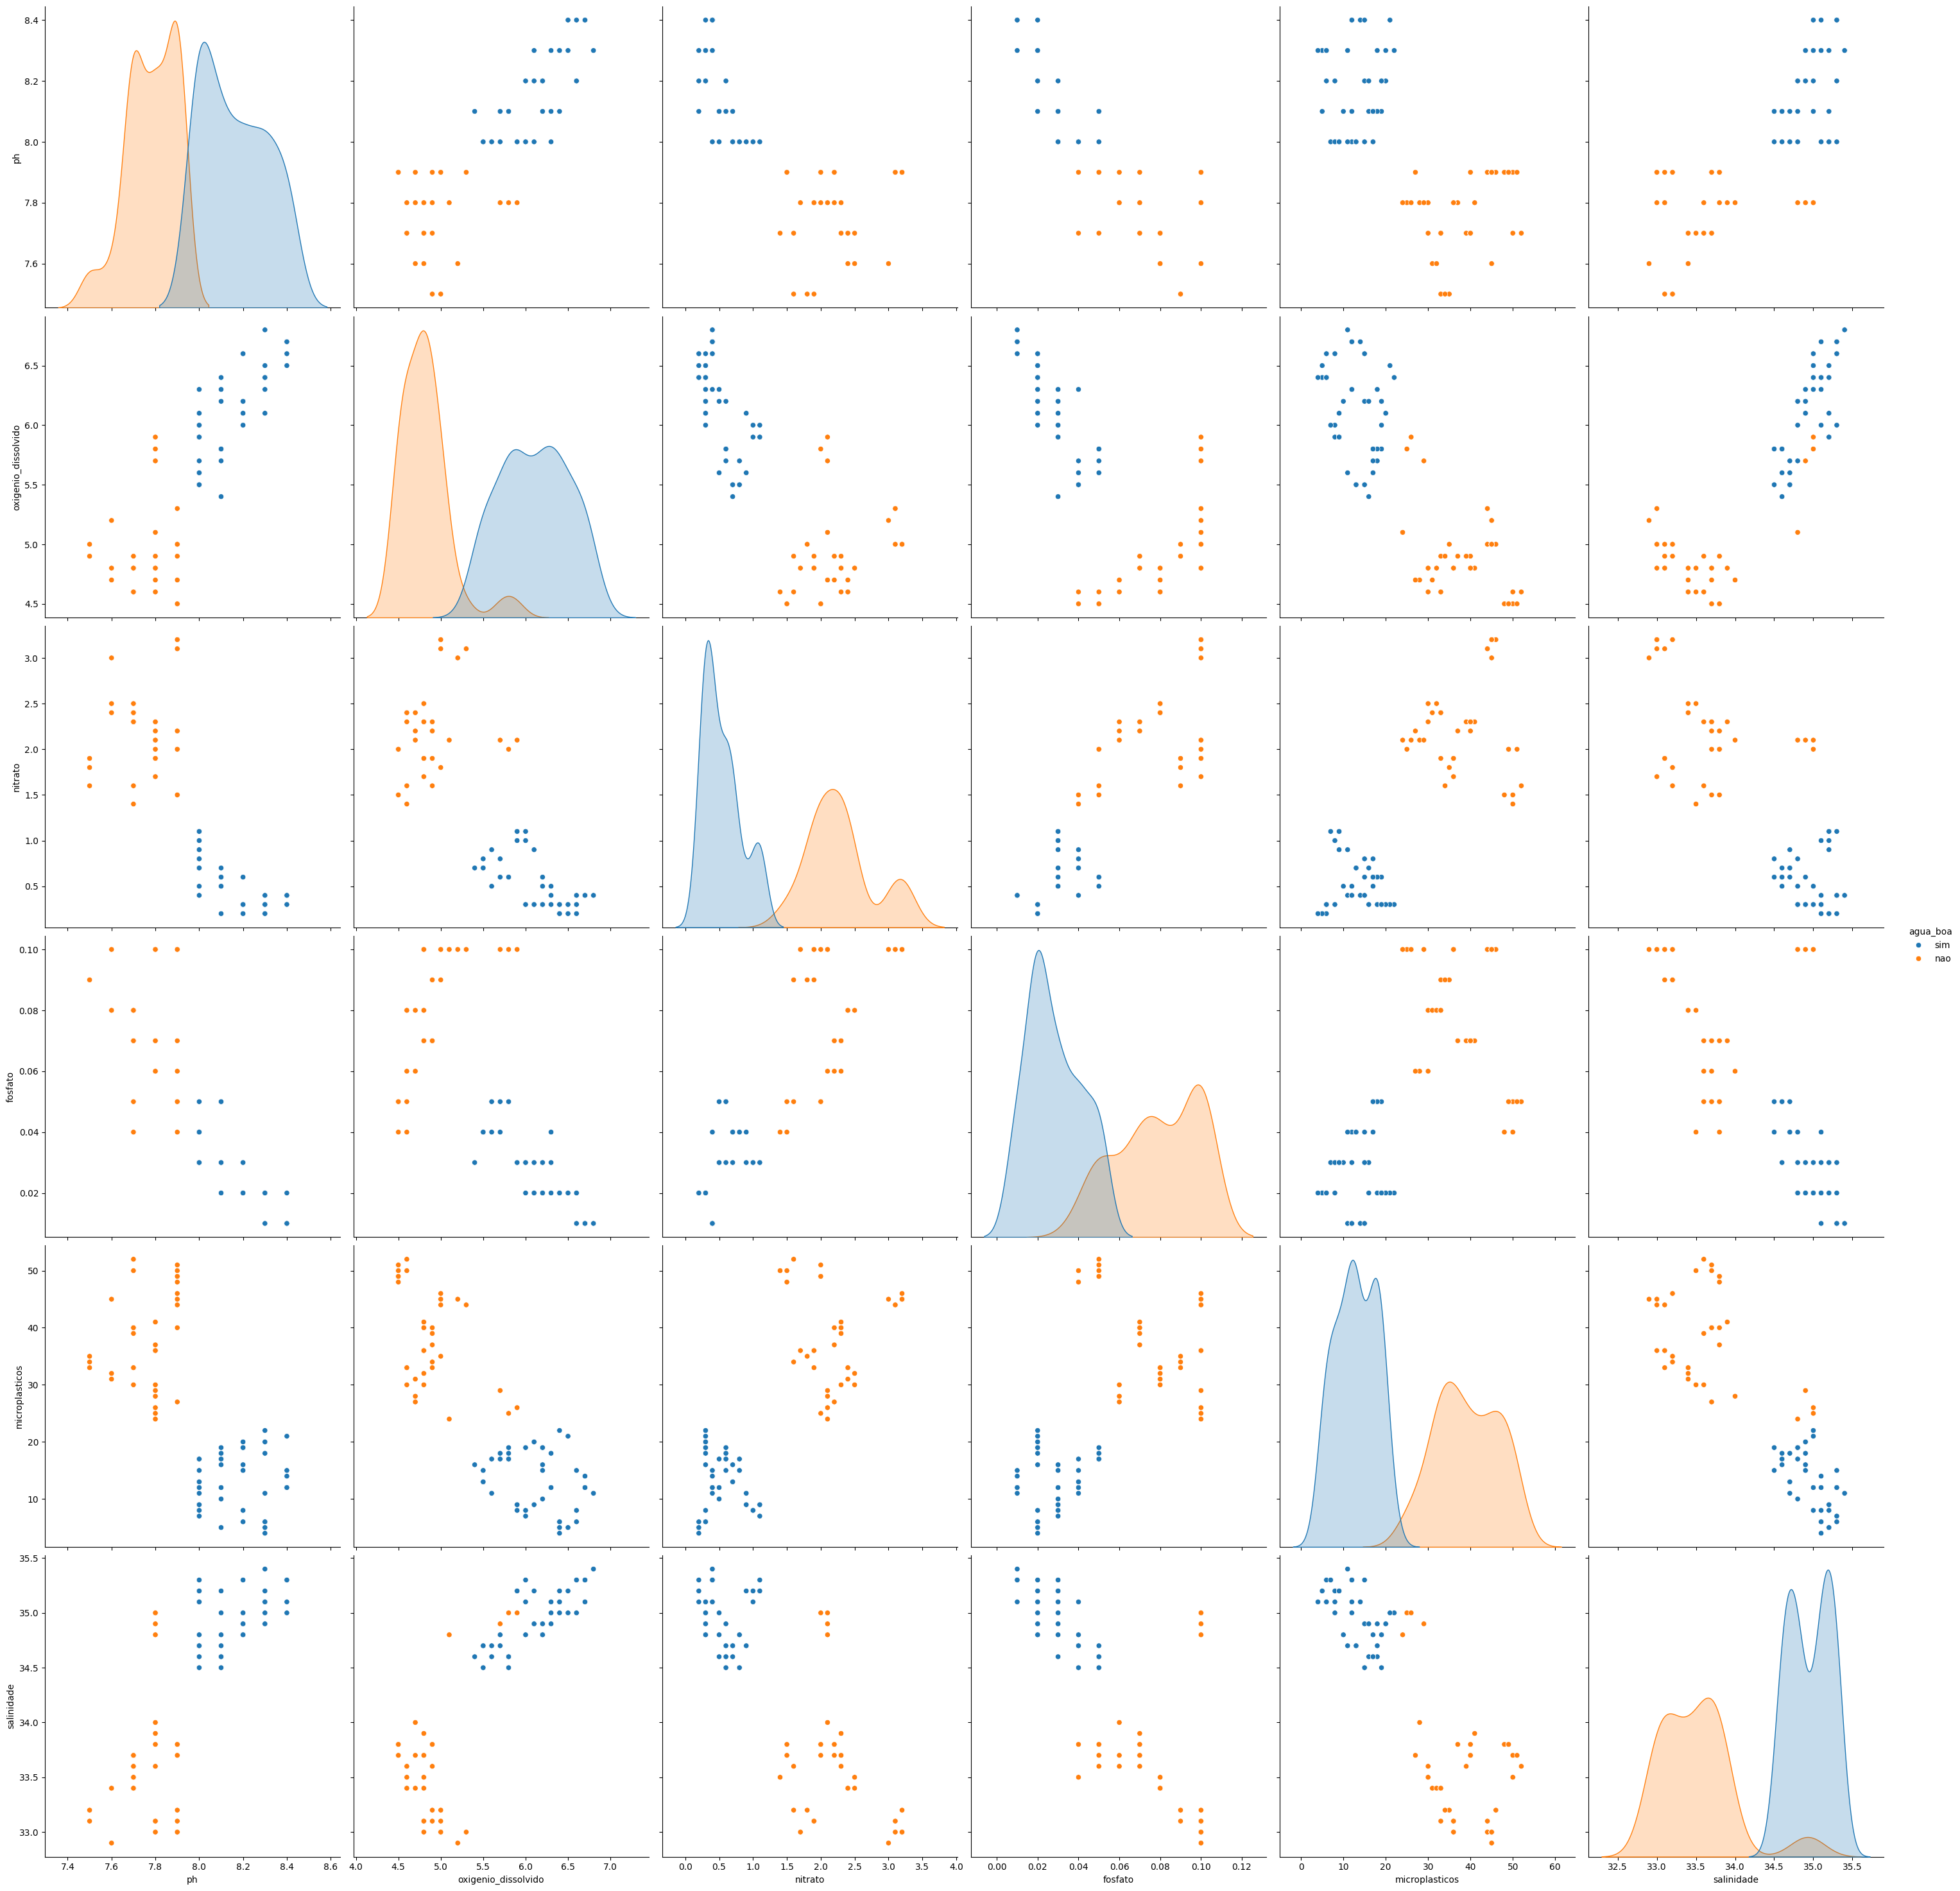

In [ ]:
# A cor vem do campo `agua_boa` do dataframe (sendo laranja para sim e azul para não)

sns.pairplot(df, hue='agua_boa', height=5)

plt.show()

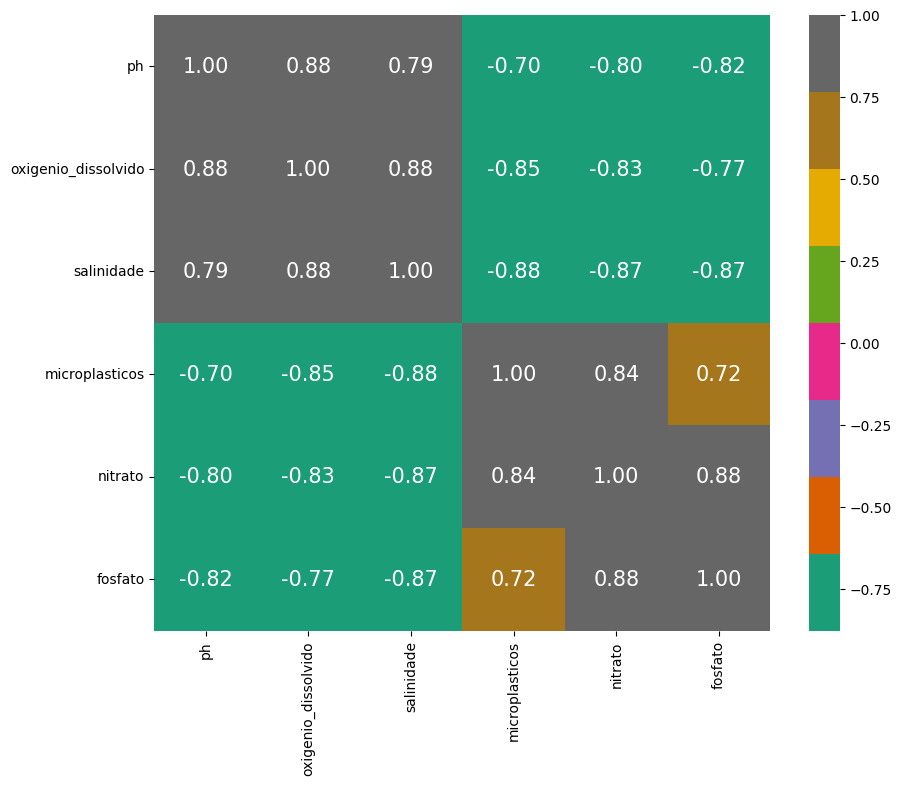

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


cols = ['ph', 'oxigenio_dissolvido', 'salinidade', 'microplasticos','nitrato', 'fosfato']
corr_matx = df[cols].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matx, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                      yticklabels=cols, xticklabels=cols, cmap='Dark2')

plt.show()


# Treinando a IA



In [ ]:
entradas = df[['ph', 'oxigenio_dissolvido', 'salinidade', 'microplasticos','nitrato', 'fosfato']]
classes = df['agua_boa']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (149, 6) e classes (149,)


In [ ]:
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.1)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (134, 6) e teste (15, 6)


In [ ]:
classes_treino.head()

98     sim
111    sim
50     nao
121    nao
143    nao
Name: agua_boa, dtype: object

In [ ]:
#Primeiras linhas do dataframe
entradas_treino.head()

,ph,oxigenio_dissolvido,salinidade,microplasticos,nitrato,fosfato
98,8.2,6.2,34.8,19,0.3,0.02
111,8.0,5.9,35.2,9,1.1,0.03
50,7.8,5.7,34.9,29,2.1,0.10
121,7.7,4.6,33.4,33,2.4,0.08
143,7.7,4.6,33.4,33,2.4,0.08


In [ ]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 12
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)






KNeighborsClassifier(n_neighbors=12)

In [ ]:
# Para obter as previsões, basta chamar o método predict()
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

Predição: ['sim' 'sim' 'nao' 'sim' 'sim' 'nao' 'nao' 'sim' 'nao' 'sim' 'sim' 'sim'
 'sim' 'nao' 'nao']


In [ ]:
from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  1.0


In [ ]:
df_treino = pd.concat((entradas_treino, classes_treino), axis=1)

novas_classes = pd.Series(classes_encontradas, name="species", index=entradas_teste.index)
df_teste = pd.concat((entradas_teste, novas_classes), axis=1)

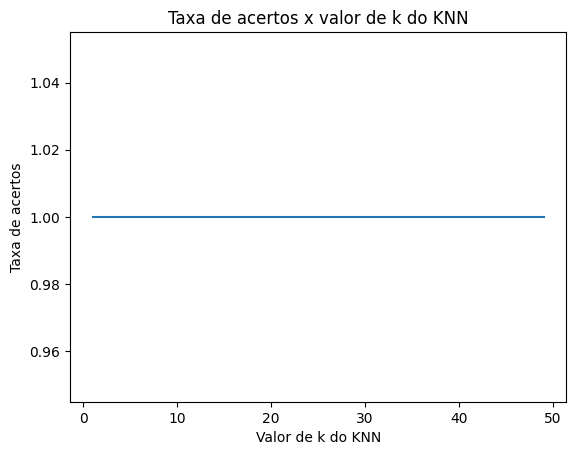

In [ ]:
k_range = list(range(1,50))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))


plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()




# Grupo Blue Horizon

Lucas Monte Verde - RM551604 - 2TDSA

Daniel Alves de Souza - RM552310 - 2TDSB

Carlos Eduardo Guedes Alcoforado - RM94787 - 2TDSPV

Luigi Exposito Uchiyama - RM99520 - 2TDSPG

João Vito Santiago - RM86293 - 2TDSA